In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image


In [2]:
samples=pd.read_csv('data/features.csv',delimiter=';')
samples.head()

,id,esp_id,label,a,b,real_rotation_hz,peak1x,peak2x,"rms(freq-1,freq+1)","median(freq-1,freq+1)","median(3,5)"
0,0,7,Normal,-0.065724,-4.573247,39.276202,0.04894,0.01040,0.005807,0.00058,0.00169
1,1,0,Normal,0.014415,-6.904798,49.048687,0.15950,0.02152,0.021100,0.00206,0.00035
2,2,4,Normal,-0.058115,-3.066945,58.100964,0.11314,0.02472,0.016180,0.00420,0.09671
3,3,5,Normal,-0.056937,-5.048600,58.610077,0.03801,0.00534,0.005194,0.00037,0.00077
4,4,7,Normal,-0.024119,-5.133935,39.276202,0.06891,0.00479,0.008267,0.00100,0.00089


In [3]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6032 non-null   int64  
 1   esp_id                 6032 non-null   int64  
 2   label                  6032 non-null   object 
 3   a                      6032 non-null   float64
 4   b                      6032 non-null   float64
 5   real_rotation_hz       6032 non-null   float64
 6   peak1x                 6032 non-null   float64
 7   peak2x                 6032 non-null   float64
 8   rms(freq-1,freq+1)     6032 non-null   float64
 9   median(freq-1,freq+1)  6032 non-null   float64
 10  median(3,5)            6032 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 518.5+ KB


In [4]:
samples.label.value_counts().reset_index()

Normal           4801
Unbalance         576
Faulty sensor     295
Rubbing           290
Misalignment       70
Name: label, dtype: int64

In [5]:
exploration_samples=samples.drop_duplicates(subset='label')
exploration_samples_id=exploration_samples.id
exploration_samples


,id,esp_id,label,a,b,real_rotation_hz,peak1x,peak2x,"rms(freq-1,freq+1)","median(freq-1,freq+1)","median(3,5)"
0,0,7,Normal,-0.065724,-4.573247,39.276202,0.04894,0.01040,0.005807,0.00058,0.001690
6,6,4,Unbalance,-0.059278,-3.425521,58.100964,0.20942,0.01410,0.029477,0.00541,0.058590
15,15,8,Faulty sensor,-0.058789,-3.517501,43.075923,0.00334,0.00215,0.000467,0.00014,0.007570
19,19,10,Rubbing,-0.025892,-4.272395,49.216734,0.04150,0.01496,0.006039,0.00154,0.003115
91,91,4,Misalignment,-0.033314,-5.380467,58.100964,0.05549,0.04025,0.008006,0.00122,0.001380


Single samples Tryout and exploration

In [6]:
signals_df=pd.read_csv('data/spectrum.csv',nrows=100,sep=';',header=None)
signals_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12093,12094,12095,12096,12097,12098,12099,12100,12101,12102
0,4.02421,1.15170,0.47998,0.36352,0.16993,0.12538,0.11462,0.06181,0.04890,0.04547,...,0.00011,0.00012,0.00012,0.00012,0.00012,0.00016,0.00016,0.00016,0.00016,0.00016
1,0.81904,0.81904,0.52569,0.47219,0.29876,0.29876,0.11756,0.11534,0.11534,0.06102,...,0.00036,0.00036,0.00036,0.00036,0.00021,0.00021,0.00021,0.00021,0.00031,0.00031
2,503.38397,162.00174,119.59272,77.84043,65.71449,49.32807,43.61787,35.10875,28.80655,26.31425,...,0.00045,0.00043,0.00043,0.00043,0.00047,0.00047,0.00047,0.00047,0.00047,0.00047
3,3.67677,1.08695,0.59899,0.34740,0.17817,0.10600,0.15606,0.15606,0.10586,0.10586,...,0.00006,0.00006,0.00008,0.00008,0.00008,0.00008,0.00008,0.00006,0.00006,0.00006
4,4.10055,1.14550,0.69125,0.25239,0.25239,0.40731,0.40731,0.26716,0.21993,0.13464,...,0.00012,0.00012,0.00012,0.00012,0.00012,0.00014,0.00014,0.00014,0.00014,0.00014


In [7]:
signals = np.loadtxt('data/spectrum.csv', delimiter=';',max_rows=exploration_samples_id.max()+1)


In [8]:
signals=signals[exploration_samples_id,:10**4] #-> just turning it into a square matrix

In [9]:
signals

array([[4.0242100e+00, 1.1517000e+00, 4.7998000e-01, ..., 2.7000000e-04,
        2.7000000e-04, 2.7000000e-04],
       [3.9706494e+02, 1.1851390e+02, 8.6766850e+01, ..., 9.1000000e-04,
        9.4000000e-04, 9.3000000e-04],
       [1.1587260e+01, 5.8997500e+00, 3.9747600e+00, ..., 4.0000000e-05,
        4.0000000e-05, 4.0000000e-05],
       [2.1195900e+00, 1.5586400e+00, 1.2166300e+00, ..., 1.2000000e-04,
        1.2000000e-04, 1.2000000e-04],
       [1.1275200e+00, 5.3342000e-01, 3.1494000e-01, ..., 1.6000000e-04,
        1.6000000e-04, 1.2000000e-04]])

In [10]:
scipy.stats.describe(signals[0,:])

DescribeResult(nobs=10000, minmax=(1e-05, 4.02421), mean=0.00119982, variance=0.0017976617136789678, skewness=87.65763548064336, kurtosis=8160.714906657144)

In [11]:
signals=np.log10(signals.reshape(-1,100,100))

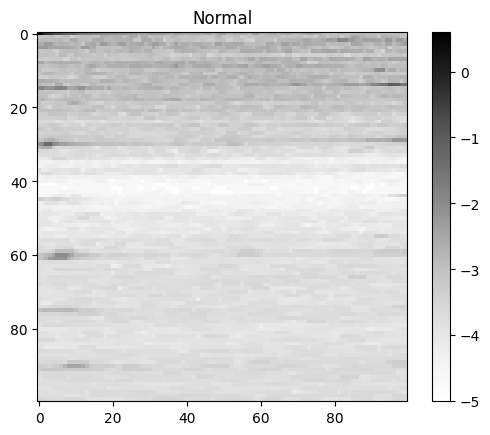

In [12]:
plt.title(exploration_samples.label.iloc[0])
plt.imshow(signals[0,:,:],cmap='Greys')
plt.colorbar()

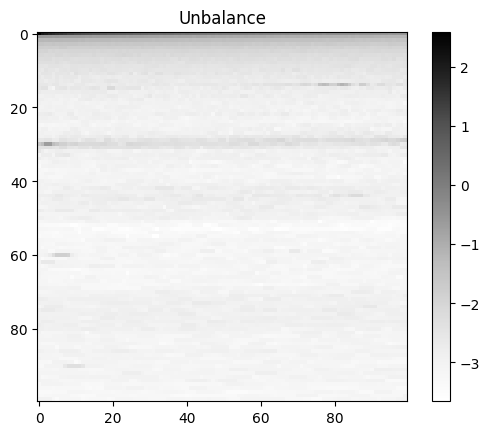

In [13]:
index=1
plt.title(exploration_samples.label.iloc[index])
plt.imshow(signals[index,:,:],cmap='Greys')
plt.colorbar()

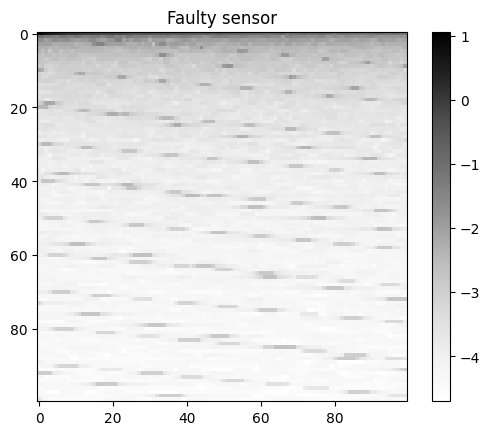

In [14]:
index=2
plt.title(exploration_samples.label.iloc[index])
plt.imshow(signals[index,:,:],cmap='Greys')
plt.colorbar()

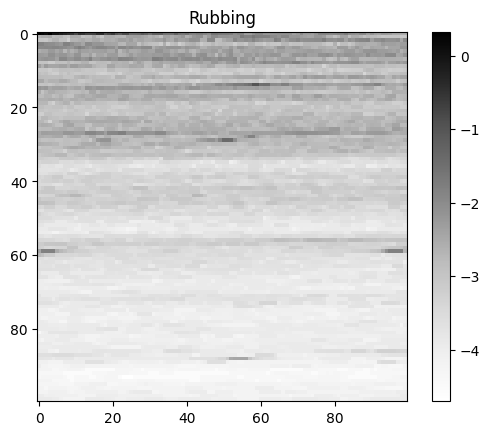

In [15]:
index=3
plt.title(exploration_samples.label.iloc[index])
plt.imshow(signals[index,:,:],cmap='Greys')
plt.colorbar()

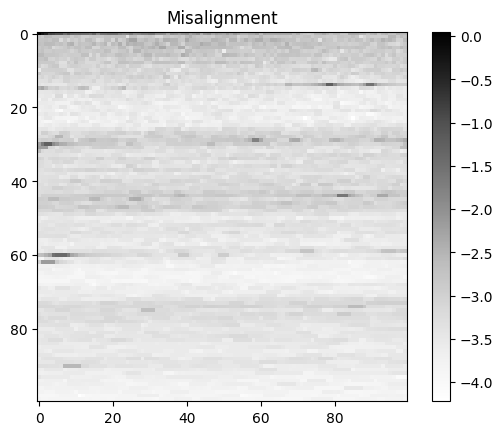

In [16]:
index=4
plt.title(exploration_samples.label.iloc[index])
plt.imshow(signals[index,:,:],cmap='Greys')
plt.colorbar()

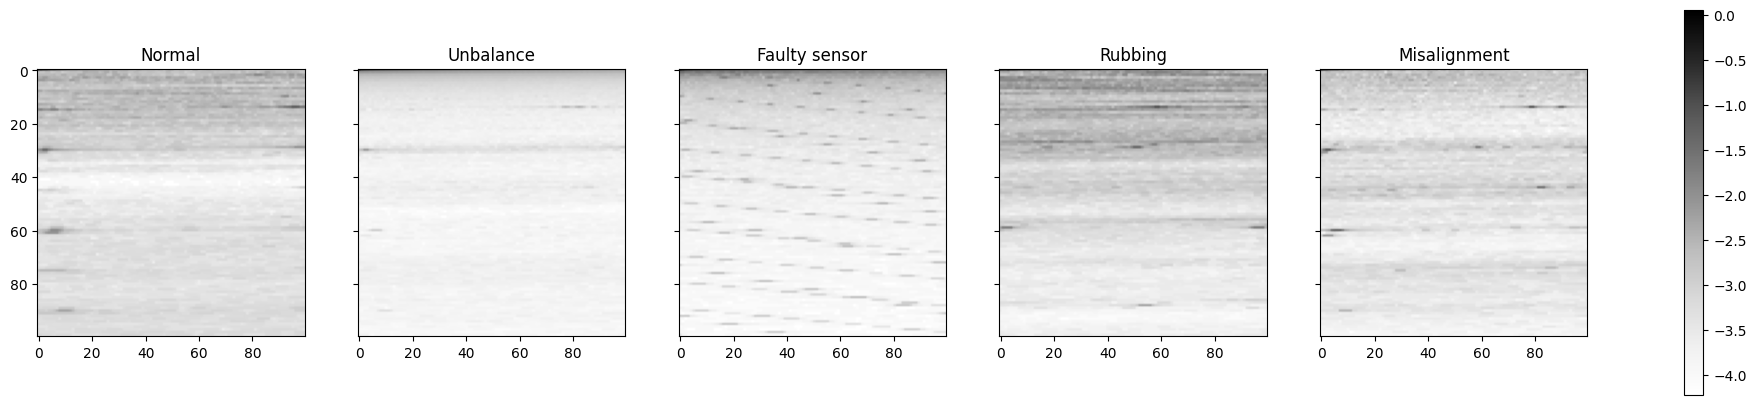

In [17]:
fig,axs=plt.subplots(1,len(exploration_samples_id),figsize=(25,5),sharex=True,sharey=True)
for index,ax in enumerate(axs):
    ax.set_title(exploration_samples.label.iloc[index])
    im=ax.imshow(signals[index,:,:],cmap='Greys')
cax,kw = mpl.colorbar.make_axes([ax for ax in axs.flat])
plt.colorbar(im, cax=cax, **kw)


Data preparation

In [18]:
import os
import sys

In [19]:
import scipy.misc


In [20]:
from IPython.display import clear_output

def splitting_spectrums(spectrums_csv_path,directory_aimed,sufix='spectrum',starting_line=0,ending_line=-1,progress_bar=True,extension='.txt'):
    if not os.path.isdir(directory_aimed):
        os.makedirs(directory_aimed)

    if ending_line==-1:
        with open(spectrums_csv_path, "rbU") as f:
            ending_line = sum(1 for _ in f)

    with open(spectrums_csv_path) as file:
        for index,line in enumerate(file):
            if index>=starting_line and index<=ending_line:
                
                filename=str(index-starting_line)+sufix
                spectrum=line
                spectrum=change_delimeter(spectrum,';',',')
                save_line(spectrum,directory_aimed,filename,extension)
                progress_display(progress_bar,starting_line,ending_line,index)

def progress_display(switch,start,end,current_stage,percentage_frequency=1):
    if switch:
        
        percentage=int(current_stage/(end-start)*100)
        frequency=int(percentage_frequency*(end-start)/100)
        if frequency==0:
            frequency=1

        if (current_stage%frequency)==0:
            display='='*percentage
            display+='>'
            display+=(100-percentage)*'-'
            sys.stdout.flush()
            clear_output(wait=True)
            print(display)    
    

def change_delimeter(line:str,old_delimeter:str,new_delimeter:str)->str:
    new_line=line.replace(old_delimeter,new_delimeter)
    return new_line

def save_line(line,folder,filename,extension):
    with open(os.path.join(folder,filename+extension),'w+') as new_file:
        new_file.write(line)


def save_img(img,folder,filename,extension):
    path=os.path.join(folder,filename+extension)
    # Image.save(path)
    plt.imsave(path, img, cmap='Greys')



def image_gen(np_spectrum):
    img =Image.fromarray(np_spectrum, 'L')
    return img


def splitting_spectrums_into_images(spectrums_csv_path,directory_aimed,sufix='spectrum',starting_line=0,ending_line=-1,progress_bar=True,extension='.jpg'):
    if not os.path.isdir(directory_aimed):
        os.makedirs(directory_aimed)

    if ending_line==-1:
        with open(spectrums_csv_path, "rbU") as f:
            ending_line = sum(1 for _ in f)

    with open(spectrums_csv_path,'r') as file:
        for index,line in enumerate(file):
            if index>=starting_line and index<=ending_line:
                
                filename=str(index-starting_line)+sufix
                np_spectrum=np.array(line.split(';'))[:100*100].astype(float).reshape(100,100)
                # np_log_spectrum=np.log10(np_spectrum)
                img_spectrum=image_gen(np_spectrum)                
                save_img(img_spectrum,directory_aimed,filename,extension)
                progress_display(progress_bar,starting_line,ending_line,index)

In [21]:
# splitting_spectrums_into_images('data/spectrum.csv','data/spectrums_img',ending_line=-1)

In [22]:
samples['label']=pd.Categorical(samples['label'])
samples['label_code']=samples['label'].cat.codes
samples['path']="data/log_spectrums_img/"+samples['id'].astype(str)+"spectrum.jpg"

In [23]:
binary_map={'Normal':'normal', 'Unbalance':'fault', 'Faulty sensor':'fault', 'Rubbing':'fault', 'Misalignment':'fault'}
samples['binary_label']=samples['label'].map(binary_map)
samples['binary_label_code']=samples['binary_label'].map(lambda x: 0 if x=="normal" else 1)

In [24]:
samples['label'].unique()

['Normal', 'Unbalance', 'Faulty sensor', 'Rubbing', 'Misalignment']
Categories (5, object): ['Faulty sensor', 'Misalignment', 'Normal', 'Rubbing', 'Unbalance']

In [25]:
print(samples['binary_label'].value_counts().to_frame())
fault_size=samples['binary_label'].value_counts().loc['fault']

        binary_label
normal          4801
fault           1231


In [26]:
index_normal_sample=np.random.choice(samples[samples['binary_label']=='normal']['id'].values,fault_size,replace=False)
index_normal_sample.shape,np.unique(index_normal_sample).shape

((1231,), (1231,))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
balanced_samples=samples[(samples['binary_label']=='fault')|(samples.index.isin(index_normal_sample))][['path','binary_label_code','label_code']]

In [29]:
train_df,test_df,_,_=train_test_split(balanced_samples,balanced_samples['binary_label_code'],test_size=0.3,stratify=balanced_samples['label_code'])
test_df,val_df,_,_=train_test_split(test_df,test_df['binary_label_code'],test_size=0.5,stratify=test_df['label_code'])

In [30]:
train_df.to_csv('trainning_dataset.csv',index=False)
val_df.to_csv('validation_dataset.csv',index=False)
test_df.to_csv('testing_dataset.csv',index=False)

PCA

In [31]:
balanced_samples.index

Int64Index([   1,    3,    4,    5,    6,   15,   16,   17,   19,   20,
            ...
            6004, 6005, 6006, 6008, 6010, 6012, 6016, 6019, 6025, 6026],
           dtype='int64', length=2462)

In [32]:
# signals_df=pd.read_csv('data/spectrum.csv',header=None,delimiter=';',skiprows=lambda x: x not in balanced_samples.index.values)
signals_df=pd.read_csv('data/spectrum.csv',header=None,delimiter=';')

signals_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12093,12094,12095,12096,12097,12098,12099,12100,12101,12102
0,4.02421,1.15170,0.47998,0.36352,0.16993,0.12538,0.11462,0.06181,0.04890,0.04547,...,0.00011,0.00012,0.00012,0.00012,0.00012,0.00016,0.00016,0.00016,0.00016,0.00016
1,0.81904,0.81904,0.52569,0.47219,0.29876,0.29876,0.11756,0.11534,0.11534,0.06102,...,0.00036,0.00036,0.00036,0.00036,0.00021,0.00021,0.00021,0.00021,0.00031,0.00031
2,503.38397,162.00174,119.59272,77.84043,65.71449,49.32807,43.61787,35.10875,28.80655,26.31425,...,0.00045,0.00043,0.00043,0.00043,0.00047,0.00047,0.00047,0.00047,0.00047,0.00047
3,3.67677,1.08695,0.59899,0.34740,0.17817,0.10600,0.15606,0.15606,0.10586,0.10586,...,0.00006,0.00006,0.00008,0.00008,0.00008,0.00008,0.00008,0.00006,0.00006,0.00006
4,4.10055,1.14550,0.69125,0.25239,0.25239,0.40731,0.40731,0.26716,0.21993,0.13464,...,0.00012,0.00012,0.00012,0.00012,0.00012,0.00014,0.00014,0.00014,0.00014,0.00014


In [33]:
signals_df.shape

(6032, 12103)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=signals_df.shape[1])
pca.fit(signals_df)


ValueError: n_components=12103 must be between 0 and min(n_samples, n_features)=6032 with svd_solver='full'

In [ ]:
# del signals_df

In [ ]:
print(pca.explained_variance_ratio_[:25])


In [ ]:
# signals_df=pd.read_csv('data/spectrum.csv',header=None,delimiter=';')
# signals_df.head()

In [ ]:
signals_pca_df=pd.DataFrame(pca.transform(signals_df))

In [ ]:
# signals_pca_df.to_csv('spectums_pca.csv',index=False,header=False)

In [ ]:
plt.imshow(np.log10(signals_df.iloc[0,:10**4]).values.reshape(100,100))

In [ ]:
plt.imshow(np.log10(signals_pca_df.iloc[0,:]).values.reshape(20,20),cmap='gray')
plt.colorbar()

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.xlim(0,20)
plt.yscale('log')

In [35]:
### usar transformers